# PROJECT 3: MADELON DATA ANALYSIS

---


In [5]:
# The madelon_analyzer includes all of the imports and the madelone_analyzer class that has all functions I've 
# been using for analysis.

%run madelon_analyzer
%matplotlib inline

In [6]:
# Assigning file paths to variables. 
train_data_uci_madelon = './web_madelon_data/madelon_train.data.txt'
train_label_uci_madelon = './web_madelon_data/madelon_train.labels.txt'
val_data_uci_madelon = './web_madelon_data/madelon_valid.data.txt'
val_label_uci_madelon = './web_madelon_data/madelon_valid.labels.txt'
test_data_uci_madelon = './web_madelon_data/madelon_test.data.txt'
params_uci_madelon = './web_madelon_data/madelon.param.txt'


# Creating dataframes for the train, test, and val datasets.
train_uci_df = pd.read_csv(train_data_uci_madelon, delimiter=' ', header=None).drop(500, axis=1)
test_uci_df = pd.read_csv(test_data_uci_madelon, delimiter=' ', header=None).drop(500, axis=1)
val_uci_df = pd.read_csv(val_data_uci_madelon, delimiter=' ', header=None).drop(500, axis=1)


# Creating column names for all of the uci dataframes.
feature_col_names = ['feat_{}'.format(i) for i in range(0,500)]
train_uci_df.columns = feature_col_names
test_uci_df.columns = feature_col_names
val_uci_df.columns = feature_col_names


y_train = pd.read_csv(train_label_uci_madelon, header=None)
y_val = pd.read_csv(val_label_uci_madelon, header=None)

y_train.columns = ['target']
y_val.columns = ['target']


# Final DataFrames with labels
train_uci_df = pd.merge(train_uci_df, y_train, left_index=True, right_index=True)
val_uci_df = pd.merge(val_uci_df, y_val, left_index=True, right_index=True)

# 20 Columns (5 important, 15 redundant)
top_20_real_features = [28,48,64,105,128,153,241,281,318,336,338,378,433,442,451,453,455,472,475,493]
top_14_elasticnet_real_features = [64,105,153,241,318,336,338,378,442,453,455,472,475,493]
top_12_real_features = [48,64,105,128,241,318,336,338,378,442,453,475]
top_7_real_features = [64, 128, 241, 336, 338, 378, 475]
top_5_real_features = [64, 336, 338, 378, 475]

best_score_list = [28, 48, 105, 128, 153, 281, 318, 336, 338, 378, 442, 451, 455, 472, 475]

all_feat_lists = [top_20_real_features, top_12_real_features, top_7_real_features, top_5_real_features]

In [7]:
def test_features_for_normal(df, features):
    
    normals = {}

    X = df[features]
    
    X_sc = ss.fit_transform(X)
    
    for f in features:

        p = normaltest(X_sc[f]).pvalue
        
        if p >= 0.05:
            normals[f] = normaltest(X_sc[f]).pvalue
    
    return normals.keys()

---

## Initial thoughts:

#### UCI Web Data

Using the unsupervised learning technique where a regressor is used to compare every feature (column) against the rest of the dataset and find correlated features, I was able to find exactly 20 features that have mean R^2 scores that are positive, and most of them are very high (in the 0.8-0.9 range) for all three of the random data subsets. Since 480/500 of the features in the madelon dataset are noise, and all three of my samples returned identical lists of features, I believe that this is a good indication that I have found my 5 predictor features and the 15 linear combinations.

---

In [8]:
# small sample lists for testing
s1_train_uci_10 = train_uci_df.sample(int(len(train_uci_df)*0.1), random_state=1)
s2_train_uci_10 = train_uci_df.sample(int(len(train_uci_df)*0.1), random_state=10)
s3_train_uci_10 = train_uci_df.sample(int(len(train_uci_df)*0.1), random_state=100)

In [9]:
MA_regression = madelon_analyzer(train_uci_df, val_uci_df)

In [10]:
%time s1_dtree_score_df = MA_regression.mean_r2_for_all_features(s1_train_uci_10, DecisionTreeRegressor)
s1_dtree_score_df[:25]

CPU times: user 2min 49s, sys: 0 ns, total: 2min 49s
Wall time: 2min 50s


,r2_score,feature
153,0.952375,feat_153
475,0.946658,feat_475
433,0.945603,feat_433
318,0.944197,feat_318
451,0.942589,feat_451
241,0.937304,feat_241
442,0.936693,feat_442
472,0.936217,feat_472
28,0.934622,feat_28
48,0.932126,feat_48


In [8]:
s2_dtree_score_df = MA_regression.mean_r2_for_all_features(s2_train_uci_10, DecisionTreeRegressor)
s2_dtree_score_df[:25]

,r2_score,feature
128,0.945829,feat_128
28,0.939542,feat_28
451,0.939155,feat_451
153,0.936929,feat_153
336,0.935527,feat_336
48,0.934564,feat_48
318,0.933189,feat_318
475,0.931282,feat_475
281,0.930208,feat_281
241,0.929596,feat_241


In [9]:
s3_dtree_score_df = MA_regression.mean_r2_for_all_features(s3_train_uci_10, DecisionTreeRegressor)
s3_dtree_score_df[:25]

,r2_score,feature
241,0.939436,feat_241
128,0.936951,feat_128
318,0.934951,feat_318
28,0.933727,feat_28
48,0.933657,feat_48
453,0.932541,feat_453
336,0.932287,feat_336
105,0.928431,feat_105
64,0.928167,feat_64
451,0.925625,feat_451


In [10]:
# Added all of my top 20 columns for the 3 random 10% samples to see if there was variation, and they all got the 
    # exact same features. This is a good sign!

s1_correlated_cols = list(s1_dtree_score_df.head(20).index)  
s2_correlated_cols = list(s2_dtree_score_df.head(20).index)    
s3_correlated_cols = list(s3_dtree_score_df.head(20).index)    

len(set(s1_correlated_cols+s2_correlated_cols+s3_correlated_cols))

20

In [11]:
s_all_results_df = pd.DataFrame([sorted(s1_correlated_cols), sorted(s2_correlated_cols), sorted(s3_correlated_cols)]).T
s_all_results_df.columns = ['sample_1', 'sample_2', 'sample_3']
s_all_results_df

,sample_1,sample_2,sample_3
0,28,28,28
1,48,48,48
2,64,64,64
3,105,105,105
4,128,128,128
5,153,153,153
6,241,241,241
7,281,281,281
8,318,318,318
9,336,336,336


---

## Benchmark

I used a naive, cross validated KNeighborsClassifer as my benchmark score using the 20 features I identified above. This resulted in a validation score of 0.91333.

---

In [12]:
MA_benchmark = madelon_analyzer(train_uci_df, val_uci_df)

In [13]:
top_20_score_benchmark = MA_benchmark.train_val_scorer_df_maker(top_20_real_features, 'top_20_features').T
top_20_score_benchmark

,train_score,val_score
top_20_features,0.9365,0.913333


---

## Features Selection

Using SelectKBest with k=5 on my 3 random data subsets, I was able to identify 8 unique features. Using SelectFromModel with the Lasso estimator, I was able to identify 9. Between these two lists of features, only 5 are the same. SelectFromModel returned 5 for the first dataset, 3 for the second, and 4 for the third. Moving forward, I will use GridSearchCV to tune my model hyperparameters and try various combinations of the important features I identified.

***EDIT***: I when and tested these selected features and none scored better than benchmark. I will need to re-evaluate my selection.

---

In [14]:
# All of this information is in the 0_EDA notebook. Since it was bad information, I left it out to revisit later.
# You can find lists of the features that were identified below.

print(top_14_elasticnet_real_features, '\n',
top_12_real_features, '\n',
top_7_real_features, '\n',
top_5_real_features,)

[64, 105, 153, 241, 318, 336, 338, 378, 442, 453, 455, 472, 475, 493] 
 [48, 64, 105, 128, 241, 318, 336, 338, 378, 442, 453, 475] 
 [64, 128, 241, 336, 338, 378, 475] 
 [64, 336, 338, 378, 475]


In [15]:
sfm = SelectFromModel(ElasticNet())
sfm.fit(train_uci_df[top_20_real_features], train_uci_df.iloc[:,-1])
sfm_feats = np.where(sfm.get_support())[0]
sfm_cols = list(train_uci_df[top_20_real_features][sfm_feats].head().columns)
sfm_cols

['feat_48', 'feat_153', 'feat_378', 'feat_475']

In [16]:
ks = range(1,21)

new_df = pd.DataFrame()

for k in ks:
    MA = madelon_analyzer(train_uci_df, val_uci_df)

    a_dict = {}
    
    skb = SelectKBest(k=k)
    skb.fit(train_uci_df[top_20_real_features], train_uci_df.iloc[:,-1])
    skb_feats = np.where(skb.get_support())[0]
    skb_cols = list(train_uci_df[top_20_real_features][skb_feats].head().columns)
    
    tra_val_df = MA.train_val_scorer_df_maker(skb_cols, '{} k'.format(k))
    
    if k == 1:
        new_df = tra_val_df
    
    new_df = pd.merge(tra_val_df, new_df, left_index=True, right_index=True)
    
new_df.T.sort_values('val_score', ascending=False)


,train_score,val_score
20 k,0.9365,0.913333
19 k,0.9365,0.906667
17 k,0.9360,0.903333
18 k,0.9345,0.898333
11 k,0.9195,0.893333
13 k,0.9270,0.891667
16 k,0.9290,0.890000
14 k,0.9285,0.890000
12 k,0.9260,0.890000
15 k,0.9275,0.888333


## Using the madelon_analyzer to determine feature importance

So far, all of the features that were derived from my selection models have scored lower than just using all 20 of the features I identified during preprocessing. Using the madelon_analyzer I created, I've been able to score better than benchmark on a couple of occasion. 

In [17]:
from scipy.stats.mstats import normaltest

In [18]:
ss = StandardScaler()

test_features_for_normal(train_uci_df, best_score_list)

/opt/conda/lib/python3.6/site-packages/scipy/stats/mstats_basic.py:2237: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  np.min(n))


dict_keys([28, 48, 105, 128, 153, 281, 336, 338, 378, 442, 451, 472, 475])

In [19]:
ma_20 = madelon_analyzer(train_uci_df, val_uci_df)

In [20]:
knc_params = {
        'n_neighbors':range(1,50,2)
        }

ma_20_df = ma_20.train_val_scorer_df_maker(top_20_real_features, 'top_20_class_test',\
                                                KNeighborsClassifier, knc_params)

In [21]:
ma_20.results

{'top_20_class_test': {'train_score': 0.94750000000000001,
  'val_score': 0.91333333333333333}}

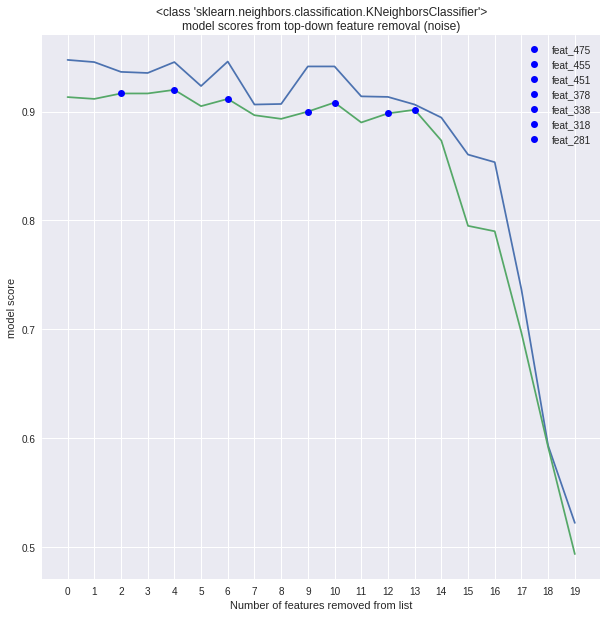

(    train_score  val_score
 0        0.9475   0.913333
 1        0.9455   0.911667
 2        0.9365   0.916667
 3        0.9355   0.916667
 4        0.9455   0.920000
 5        0.9235   0.905000
 6        0.9460   0.911667
 7        0.9065   0.896667
 8        0.9070   0.893333
 9        0.9415   0.900000
 10       0.9415   0.908333
 11       0.9140   0.890000
 12       0.9135   0.898333
 13       0.9065   0.901667
 14       0.8945   0.873333
 15       0.8605   0.795000
 16       0.8535   0.790000
 17       0.7365   0.696667
 18       0.5930   0.591667
 19       0.5220   0.493333, [475, 455, 451, 378, 338, 318, 281])

In [22]:
ma_20.plot_top_down_feature_elimination_scores(top_20_real_features, \
                                            KNeighborsClassifier, \
                                            knc_params, noise=True)

In [23]:
ma_20.params

{'n_neighbors': range(1, 50, 2)}

In [24]:
pd.DataFrame(ma_20.results).T

,train_score,val_score
0,0.9475,0.913333
1,0.9455,0.911667
2,0.9365,0.916667
3,0.9355,0.916667
4,0.9455,0.920000
5,0.9235,0.905000
6,0.9460,0.911667
7,0.9065,0.896667
8,0.9070,0.893333
9,0.9415,0.900000


In [25]:
ma_best = madelon_analyzer(train_uci_df, val_uci_df)

In [26]:
rf_params = {
    'n_estimators':[10,50,100,200],
    'max_features':['auto','log2'],
}

ma_best.train_val_scorer_df_maker(best_score_list, 'best_score_MA', \
                                  model=RandomForestClassifier, params=rf_params)

,best_score_MA
train_score,1.000000
val_score,0.896667


In [27]:
print(ma_best.model, '\n', ma_best.params, '\n', ma_best.features)

<class 'sklearn.ensemble.forest.RandomForestClassifier'> 
 {'n_estimators': [10, 50, 100, 200], 'max_features': ['auto', 'log2']} 
 [28, 48, 105, 128, 153, 281, 318, 336, 338, 378, 442, 451, 455, 472, 475]


In [28]:
ma_best.best_params_

{'max_features': 'log2', 'n_estimators': 200}

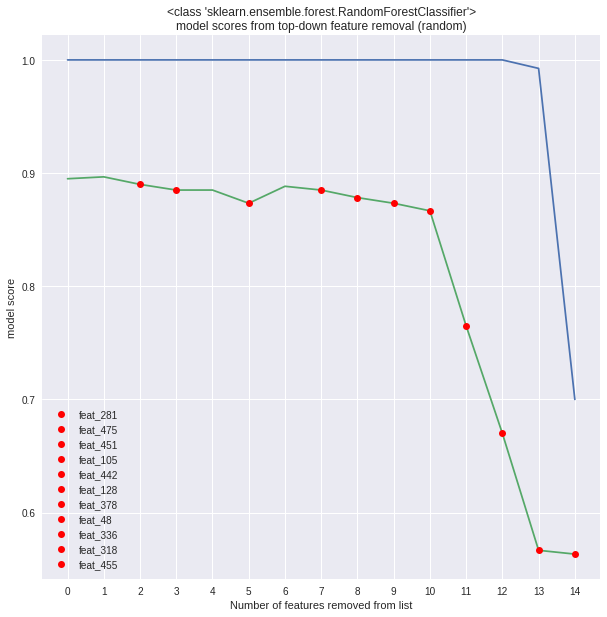

(    train_score  val_score
 0        1.0000   0.895000
 1        1.0000   0.896667
 2        1.0000   0.890000
 3        1.0000   0.885000
 4        1.0000   0.885000
 5        1.0000   0.873333
 6        1.0000   0.888333
 7        1.0000   0.885000
 8        1.0000   0.878333
 9        1.0000   0.873333
 10       1.0000   0.866667
 11       1.0000   0.765000
 12       1.0000   0.670000
 13       0.9925   0.566667
 14       0.7000   0.563333,
 [281, 475, 451, 105, 442, 128, 378, 48, 336, 318, 455])

In [29]:
ma_best.plot_top_down_feature_elimination_scores(best_score_list, \
                                               model=RandomForestClassifier, \
                                               params=rf_params, random=True)

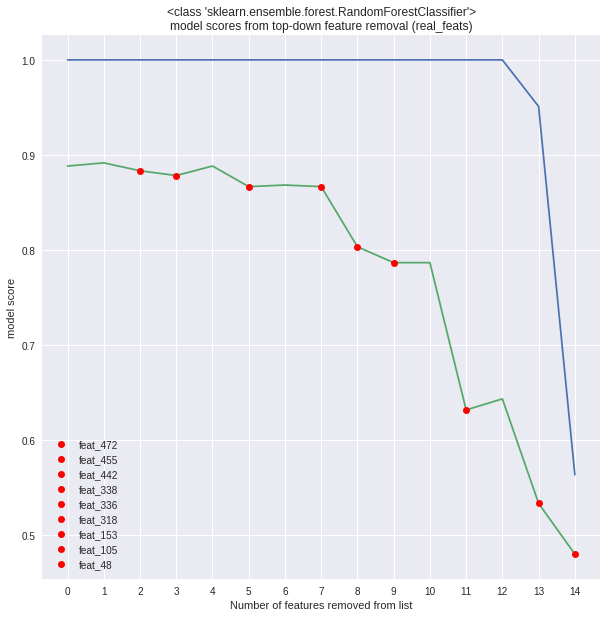

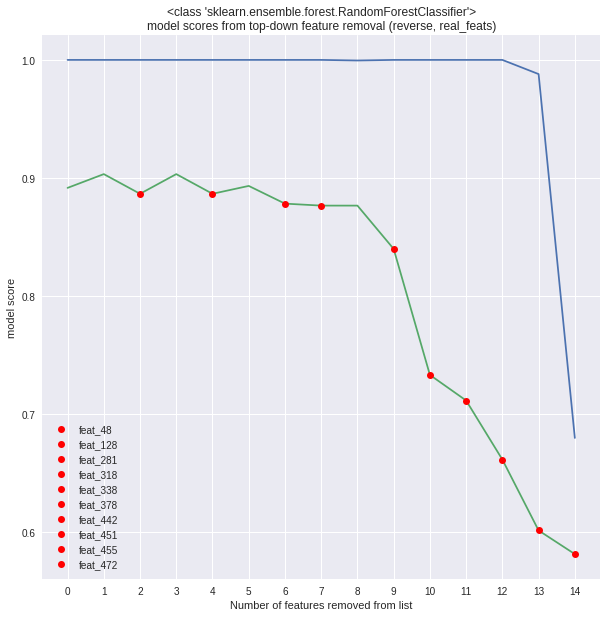

TOP REAL FEATURES: [48, 128, 281, 318, 336, 338, 442, 455, 472]


[48, 128, 281, 318, 336, 338, 442, 455, 472]

In [30]:
ma_best.list_top_dipped_feats(best_score_list, \
                               model=RandomForestClassifier, \
                               params=rf_params)

In [31]:
ma_yeahhh = madelon_analyzer(train_uci_df, val_uci_df)

In [32]:
ma_yeahhh.train_val_scorer_df_maker([28, 105, 153, 281, 318, 336, 338, 442, 472, 475], 'yeahhh',\
                                   model=RandomForestClassifier, \
                                   params=rf_params)

,yeahhh
train_score,1.00
val_score,0.87


In [33]:
rf_params = {
    'n_estimators':[10,50,100,200],
    'max_features':['auto','log2'],
}

bf_df = ma_yeahhh.brute_force_feature_combination_score_generator(best_score_list, \
                                                                  RandomForestClassifier, rf_params, 3)



Number of combinations: 455


In [82]:
sorted([ma_yeahhh.make_set_from_list_of_lists(bf_df['features'][:1].values)])

[[105, 338, 475]]

In [86]:
[sorted(x) for x in bf_df['features'][:1].values]

[[105, 338, 475]]

In [87]:
[sorted(x) for x in bf_df['features'][:1].values] == \
sorted([ma_yeahhh.make_set_from_list_of_lists(bf_df['features'][:1].values)])

True

In [45]:
yeahhh_train_val_score_df = ma_yeahhh.train_val_scorer_df_maker(ma_yeahhh.make_set_from_list_of_lists(bf_df['features'][:100].values), \
                                                                         'yeahhh', model=RandomForestClassifier, \
                                                                          params=rf_params) 

In [50]:
yeahhh_train_val_score_df.T

,train_score,val_score
yeahhh,1.0,0.898333


In [102]:
# # Commented out bc it takes so long to run this cell.

# val_df = {}

# for i in range(1,400,2):
#     train_val_df_temp = ma_yeahhh.train_val_scorer_df_maker(ma_yeahhh.make_set_from_list_of_lists(bf_df['features'][:i].values), \
#                                                                          'yeahhh', model=RandomForestClassifier, \
#                                                                           params=rf_params) 
#     val_df[i] = {'val_score': train_val_df_temp.T['val_score']}
        
# val_df

In [40]:
test_features_for_normal(train_uci_df, top_20_real_features)

dict_keys([28, 48, 64, 105, 241, 281, 318, 336, 338, 378, 433, 442, 451, 453, 455, 472, 475, 493])

### PCA on UCI Data

In [138]:
from sklearn.decomposition import PCA

In [145]:
pca = PCA(n_components=5)

pca_vec = pca.fit(train_uci_df[:-1])

In [146]:
pca.explained_variance_ratio_

array([ 0.10391106,  0.08555041,  0.05470548,  0.02294792,  0.01028483])

### Large Dataset Analysis